# Assignment 1

**Assignment 1: Optimization**

**Goal**: ​Get familiar with gradient-based and derivative-free optimization by implementing these methods and applying them to a given function.

In this assignment we are going to learn about **gradient-based** (GD) optimization methods and **derivative-free optimization** (DFO) methods. The goal is to implement these methods (one from each group) and analyze their behavior. Importantly, we aim at noticing differences between these two groups of methods.

Here, we are interested in ​minimizing​ the following function:

$$
f(\mathbf{x})=x_{1}^{2}+2 x_{2}^{2}-0.3 \cos \left(3 \pi x_{1}\right)-0.4 \cos \left(4 \pi x_{2}\right)+0.7
$$

in the domain $\mathbf{x} = (x_1, x_2) \in [-100, 100]^{2}$ (i.e., $x_1 \in [-100, 100]$, $x_2 \in [-100, 100]$).

In this assignemnt, you are asked to implement:
1. The gradient-descent algorithm.
2. A chosen derivative-free algorithm. *You are free to choose a method.*

After implementing both methods, please run experiments and compare both methods. Please find a more detailed description below.

## 1. Understanding the objective

Please run the code below and visualize the objective function. Please try to understand the objective function, what is the optimum (you can do it by inspecting the plot).

If any code line is unclear to you, please read on that in numpy or matplotlib docs.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def f(x):
    return x[:,0]**2 + 2*x[:,1]**2 -0.3*np.cos(3.*np.pi*x[:,0])-0.4*np.cos(4.*np.pi*x[:,1])+0.7

In [4]:
# PLEASE DO NOT REMOVE!
# Calculating the objective for visualization.
def calculate_f(x1, x2):
    f_x = []
    for i in range(len(x1)):
        for j in range(len(x2)):
            f_x.append(f(np.asarray([[x1[i], x2[j]]])))

    return np.asarray(f_x).reshape(len(x1), len(x2))

In [5]:
# PLEASE DO NOT REMOVE!
# Define coordinates
x1 = np.linspace(-100., 100., 400)
x2 = np.linspace(-100., 100., 400)

# Calculate the objective
f_x = calculate_f(x1, x2).reshape(len(x1), len(x2))

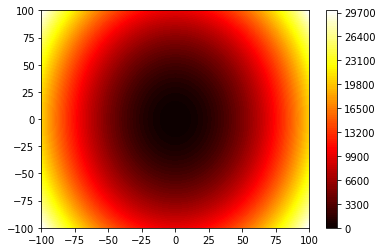

In [6]:
# PLEASE DO NOT REMOVE!
# Plot the objective
plt.contourf(x1, x2, f_x, 100, cmap='hot')
plt.colorbar()

## 2. The gradient-descent algorithm

First, you are asked to implement the gradient descent (GD) algorithm. Please take a look at the class below and fill in the missing parts.

NOTE: Please pay attention to the inputs and outputs of each function.

NOTE: To implement the GD algorithm, we need a gradient with respect to $\mathbf{x}$ of the given function. Please calculate it on a paper and provide the solution below. Then, implement it in an appropriate function that will be further passed to the GD class.

**Question 1 (0-1pt):** What is the gradient of the function $f(\mathbf{x})$?

**Answer:**
\begin{align*}
\nabla_{\mathbf{x}_1} f(\mathbf{x}) &= 2x_1+0.9\pi\sin(3\pi x_1)\\
\nabla_{\mathbf{x}_2} f(\mathbf{x}) &= 4x_2+1.6\pi\sin(4\pi x_2) \\
\end{align*}

In [15]:
def grad(x):
#     print(x)
    # getting both axis from input vector x
    x1, x2 = x[0][0], x[0][1]
    # calculating both gradients given the input vector values x1 and x2
    grad_x1 = 2 * x1 + 0.9 * np.pi * np.sin(3 * np.pi * x1)
    grad_x2 = 4 * x2 + 1.6 * np.pi * np.sin(4 * np.pi * x2)
    # returning the gradient as a vector of values of the derivative
    grad = np.asarray([grad_x1, grad_x2])
    return grad

In [16]:
# code used to check the functionality of the gradient function
arr = np.zeros((1,2))
arr[0][0],arr[0][1] = x1[0], x2[0]
grad(arr)

array([-200., -400.])

In [17]:
class GradientDescent(object):
    def __init__(self, grad, step_size=0.1):
        self.grad = grad
        self.step_size = step_size    

    def step(self, x_old):
        # update the x position given the step size and the negative gradient (cause we want to go down hill)
        x_new = x_old - self.grad(x_old) * self.step_size
        return x_new

In [18]:
def plot_optimization_process(ax, optimizer, title):
    # Plot the objective function
    ax.contourf(x1, x2, f_x, 100, cmap='hot')

    # Init the solution
    x = np.asarray([[90., -90.]])
    x_opt = x
    # Run the optimization algorithm
    for i in range(num_epochs):
        x = optimizer.step(x)
        x_opt = np.concatenate((x_opt, x), 0)

    ax.plot(x_opt[:,0], x_opt[:,1], linewidth=3.)
    ax.set_title(title)

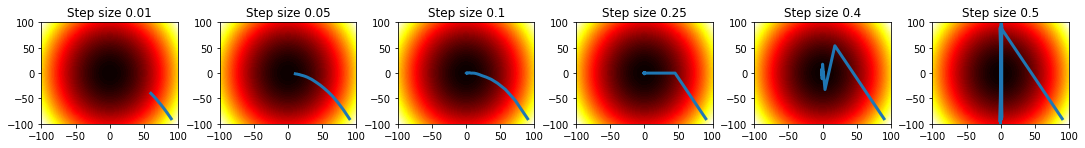

In [19]:
num_epochs = 20 # the number of epochs
step_sizes = [0.01, 0.05, 0.1, 0.25, 0.4, 0.5] # the step sizes

fig_gd, axs = plt.subplots(1,len(step_sizes),figsize=(15, 2))
fig_gd.tight_layout()

for i in range(len(step_sizes)):
    step_size = step_sizes[i]
    gd = GradientDescent(grad, step_size=step_size)
    plot_optimization_process(axs[i], optimizer=gd, title='Step size ' + str(gd.step_size))

**Question 2 (0-0.5pt)**: Please analyze the plots above and comment on the behavior of the gradient-descent for different values of the step size.

**Answer**: The plots depict how step size heavily affects the performance of a gradient descent algorithm. With a smaller step size (on the left), many small steps are made towards the right solution. This entails that correcting the descending direction is possible many times before reaching the optimum. A small step size therefore approximates the global optimum more carefully but takes longer (i.e. is more expensive to compute) to reach an acceptable solution since more steps are required. Large steps on the other hand lead to a faster but less accurate convergence towards the optimum. On the right most plot for instance, the algorithm steps back and forth across the minimal point because while knowing the right direction, the step size is too large - which makes it just "step over" the optimal solution. It might, by chance, happen that the step size is just right in order to step to a close-to-optimal solution (as seen with step size 0.25) but this is not desirable because it is still less optimal than a more careful optimization. With all of this taken into account, the optimal step size is likely 0.1 because it balances computation costs and optimal solutions.

**Question 3 (0-0.5pt)**: Can we do something about the step size equal 0.01? What about the step size equal 0.5?

**Answer**: Step size 0.01 takes long to converge to the optimal solution which means that computational costs are high. However, ignoring the costs, this step size ensures that for a convex loss surface, the optimum is more closely approximated. Thus, if computing power is readily available, this lower step size will ensure a more optimal but expensive solution. One possible solution is randomly restarting the algorithm at different starting points while keeping track of the overall best result. Another solution could be simply increasing the number of iterations. Both solutions increase computational costs, though.

Step size 0.5 on the other hand will not converge to an optimal solution even when left running for eternity. This happens because the gradient on both sides of the optimum point in opposite directions, which makes it iteratively jump back and forth. The step size is simply too high, leading to missing the solution at every step, even with infinite time. A possible solution to this could be a contiuous decrease of the step size, which would ensure exploration in the beginning and exploitation (with small step size) towards the end of the algorithm. An optimizer such as adam ensures that.

## 3. The derivative-free optimization

In the second part of this assignment, you are asked to implement a derivative-free optimziation (DFO) algorithm. Please notice that you are free to choose any DFO method you wish.
Moreover, you are encouraged to be as imaginative as possible! Do you have an idea for a new method or combine multiple methods? Great! 

**Question 4 (0-0.5-1-1.5-2-2.5-3pt)**: Please provide a description (a pseudocode) of your DFO method here.

*NOTE (grading): The more complex the method, the higher the score! Please keep it in mind during developing your algorithm. TAs will also check whether the pseudocode is correct.*

**Answer:** At each step in the following DFO, the objective funtion f is explored in a neighborhood of the current point. The size of the neighborhood is one hyperparameter and the number of explored neighbors another. The random neighbors are sampled either from a gaussian or a uniform distribution, why this choice is important is explained further down the line. 

*Input:* 
   
    FUNC objective function, 
    INT size of neighborhood, 
    INT number of neighbors, 
    BOOL storing if the sampling happens based on a gaussian or a uniform distribution

*Steps of the algorithm:*

In [20]:
from random import uniform

class DFO():
    def __init__(self, obj_func, neighborhood_size=10, nr_neighbors=50, gaussian=False):
        self.obj_func = obj_func
        self.neighborhood_size = neighborhood_size
        self.nr_neighbors = nr_neighbors
        self.gaussian = gaussian
        # store the overall best results in order to later compare the algorithms numerically
        self.minimal_fx = None
        self.best_neighbor = None
    
    def sample_random_normal(self, mean): # provides sample from gaussian distribution
        # distribution adjusted to mean and size of neighborhood
        return np.random.normal(mean, self.neighborhood_size*0.3)
    
    def sample_uniformly(self,mean): # provides sample from a uniform distribution
        # samples in a range from mean+-size of neighborhood
        return uniform(mean-self.neighborhood_size, mean+self.neighborhood_size)
    
    def get_min_neighbor(self, x_curr):
        # sets the minimal neighbor to the current point and its value of the objective function
        # this is done in order to not update the position if only worse neighbors are found
        best_neighbor = x_curr
        minimal_fx = self.obj_func(x_curr)
        # loop over number of neighbors
        for i in range(self.nr_neighbors):
            # get x1 and x2 coordinates of current point
            x1, x2 = x_curr[0][0], x_curr[0][1]
            # if boolean gaussian is true, sample new neighbor coordinates from a gaussian normal distribution
            if self.gaussian:
                neighbor_x1 = self.sample_random_normal(mean=x1)
                neighbor_x2 = self.sample_random_normal(mean=x2)
            # if boolean gaussian is false, sample new neighbor coordinates from a uniform distribution
            elif not self.gaussian:
                neighbor_x1 = self.sample_uniformly(x1)
                neighbor_x2 = self.sample_uniformly(x2)
            # summarize the two new coordinates to one x
            neighbor_x = np.array([[neighbor_x1,neighbor_x2]])
            # calculate the value of the objective funtion for the new coordinates of x
            neighbor_fx = self.obj_func(neighbor_x)
            # check if the neighbor has a lower value of the objective function than the already found one
            if neighbor_fx < minimal_fx:
                # if the neighbor is more optimal, update the current best point
                best_neighbor = neighbor_x
                minimal_fx = neighbor_fx
        # update the class variables in order to keep track of the final (overall) best found neighbor (coordinates and value) 
        self.best_neighbor = best_neighbor
        self.minimal_fx = minimal_fx
        return best_neighbor

    def step(self, x_old): # makes a step by calling the get_min_neighbor function that either finds a better neighbor
                           # or returns the old one if no better neighbor is found
        return self.get_min_neighbor(x_old)

#### The following cell was created to directly compare the performance of gaussian and uniform sampling. Plots were hidden since the table by itself is the most indicative.

In [22]:
num_epochs = 50
neighborhood_sizes = [1,2,4,16,32,64]
nrs_of_neighbors = [1,2,4,16,32,64]
gaussians = []
normals = []
hyperparams = []

for gaussian in [False, True]:
    fig_dfo, axs = plt.subplots(len(neighborhood_sizes), len(step_sizes), figsize=(15, 14))
    fig_dfo.tight_layout()
    for i in range(len(neighborhood_sizes)):
        for j in range(len(nrs_of_neighbors)):
            nr_of_neighbors = nrs_of_neighbors[j]
            neighborhood_size = neighborhood_sizes[i]
            hyperparams.append([nr_of_neighbors, neighborhood_size])
            dfo = DFO(f, neighborhood_size=neighborhood_size, nr_neighbors=nr_of_neighbors, gaussian=gaussian)
            plot_optimization_process(axs[i][j], optimizer=dfo, title=f'{"gaussian"} size {dfo.neighborhood_size}, nr {dfo.nr_neighbors}')
            fig_dfo.clear()
            if not gaussian:
                normals.append(round(dfo.minimal_fx[0],1))
            else:
                gaussians.append(round(dfo.minimal_fx[0],1))

print('size\tnumber\tuniform\tgaussian')
for i in range(len(normals)):
    print(f'{hyperparams[i][0]}\t{hyperparams[i][1]}\t{normals[i]}\t{gaussians[i]}')

size	number	uniform	gaussian
1	1	19227.2	22435.9
2	1	14832.0	20490.1
4	1	12762.1	18533.8
16	1	9310.1	14963.8
32	1	7424.7	13933.9
64	1	6686.6	12257.4
1	2	15957.1	20259.8
2	2	10096.8	17476.0
4	2	6140.6	14153.6
16	2	1255.7	7365.2
32	2	452.6	5294.9
64	2	202.1	4896.8
1	4	7777.7	16442.1
2	4	4572.1	12438.7
4	4	43.8	6600.1
16	4	0.5	919.4
32	4	0.8	43.5
64	4	0.0	0.1
1	16	7.2	962.6
2	16	18.8	4.8
4	16	0.7	0.5
16	16	0.1	0.8
32	16	0.6	0.5
64	16	0.7	0.2
1	32	54.2	103.5
2	32	73.0	3.4
4	32	11.1	1.2
16	32	4.5	1.0
32	32	2.2	1.2
64	32	1.6	0.6
1	64	53.2	30.3
2	64	17.4	2.0
4	64	21.6	3.7
16	64	5.4	6.4
32	64	13.1	1.6
64	64	2.3	0.6


<Figure size 1080x1008 with 0 Axes>

<Figure size 1080x1008 with 0 Axes>

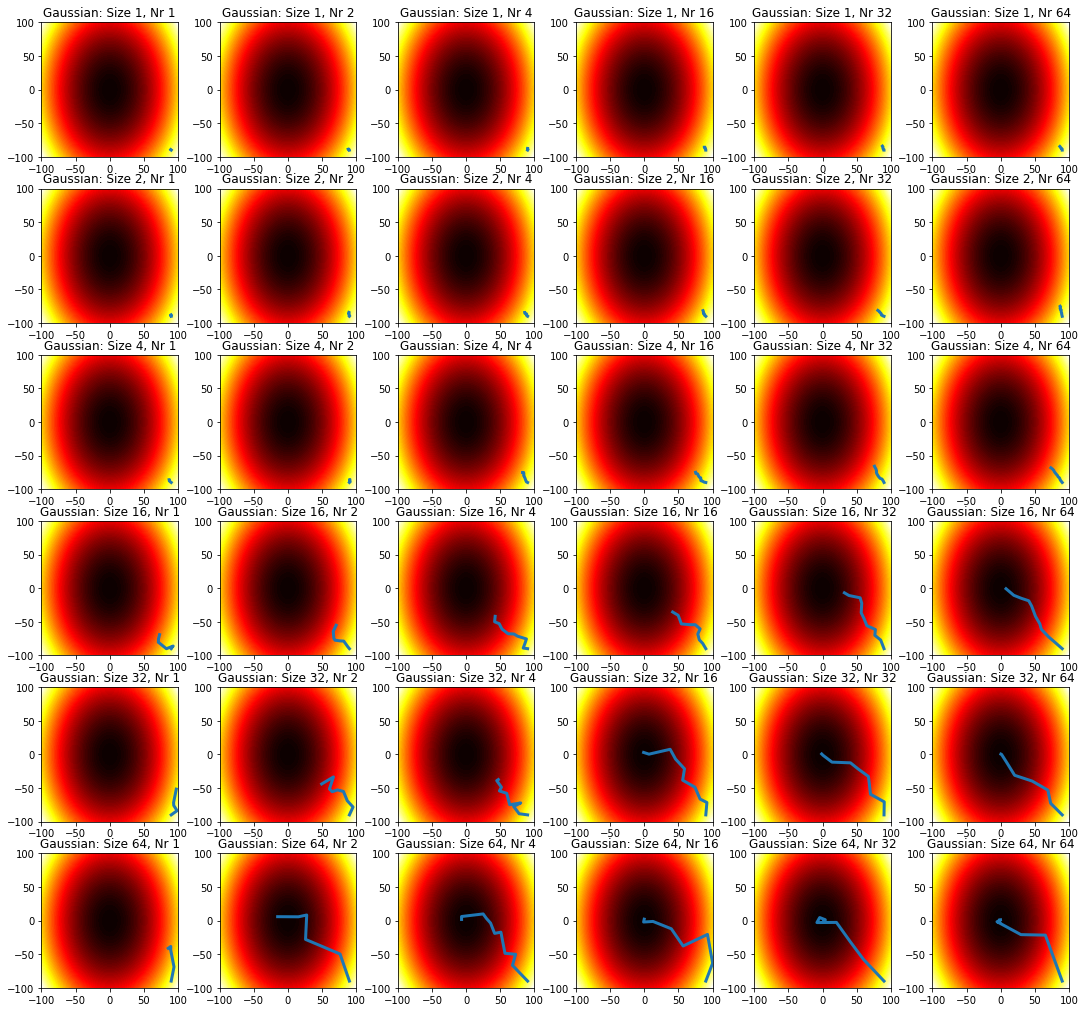

In [24]:
num_epochs = 10
neighborhood_sizes = [1,2,4,16,32,64]
nrs_of_neighbors = [1,2,4,16,32,64]
gaussians = []
normals = []
hyperparams = []
gaussian = True

fig_dfo, axs = plt.subplots(len(neighborhood_sizes), len(step_sizes), figsize=(15, 14))
fig_dfo.tight_layout()
for i in range(len(neighborhood_sizes)):
    for j in range(len(nrs_of_neighbors)):
        nr_of_neighbors = nrs_of_neighbors[j]
        neighborhood_size = neighborhood_sizes[i]
        hyperparams.append([nr_of_neighbors, neighborhood_size])
        dfo = DFO(f, neighborhood_size=neighborhood_size, nr_neighbors=nr_of_neighbors, gaussian=gaussian)
        plot_optimization_process(axs[i][j], optimizer=dfo, title=f'{"Gaussian" if gaussian else "Uniform"}: Size {dfo.neighborhood_size}, Nr {dfo.nr_neighbors}')
        if not gaussian:
            normals.append(round(dfo.minimal_fx[0],1))
        else:
            gaussians.append(round(dfo.minimal_fx[0],1))

**Question 5 (0-0.5-1pt)** Please comment on the behavior of your DFO algorithm. What are the strong points? What are the (potential) weak points? During working on the algorithm, what kind of problems did you encounter?

**Answer:** I implemented an algorithm that looks at a certain number of neighbors (which is the first hyperparameter) and checks their value according to the objective funtion f(x). Then, the current x (in the form of [x1,x2]) is set to the x with the lowest f(x) value. Iow. the most optimal neighbor is chosen as the next location. The second hyperparameter that I vary is the range of the lookup of neighbors which I called "neighborhood_size" - which defines the range (from the original x) of the randomly sampled neighbors. The last hyperparameter is the different distributions from which I sample the neighbor locations; both from a uniform as well as a gaussian distribution. 

Since all the results are heavily influnced by chance, I ran the algorithms several times and noticed a trend. In the additional cell that produces the direct comparison between the gaussian and uniform sampling, it becomes visible that gaussian distribution performs better when higher hyperparameters of neighborhood_size and number_of_neighbors are chosen. This happens for the following reason: when the algorithm finds a well-positioned neighbor that is close to the optimum, it makes more sense to sample close neighbors with a higher likelihood (which is what gaussian does) than sampling neighbors at all distances with equal likelihood. Distant neighbors will not yield better results if the current point is almost optimal, whereas close neighbors might be slightly closer to the optimum. This is essentially a problem of exploitation (sampling from gaussian) vs exploration (uniform sampling). 

Since this convex loss surface prioritizes exploitation for finding the most optimal central point, I chose gaussian sampling as the standard for my implementation. In my particular implementation, I also have the standard deviation for the sampling adjusted to the gradient. This entails that higher gradient leads to more exploration and lower gradient to more exploitation, which is essentially what "temperature" does for this problem. This means that gaussian sampling performs much better for higher hyperparameters than uniform sampling.

Analysing the behavior, the following acknowledgements can be made: Keeping the Size (of neighborhood) low and the Nr (of neighboring positions explored) high makes the algorithm converge very slowly (computationally expensive) but accurately converge towards the optimal solution since it makes small but accurate steps. With a high Size and a low Nr on the other hand, large but less accurate steps are made towards the optimal solution. The plots thus provide evidence to why higher hyperparemeters of Size  and Nr make up a better search algorithm.

The strong points of this algorithm is that the minimization function f does not need to be differentiable. Even with a function working like a black box, this algorithm can find near-optimal solutions for a convex loss surface. However, if the minimization objective does not have a convex form, then this algorithm could easily get stuck in local minima. This could be tackled with rerunning the algorithm several times while keeping track of previous results. Another weak point are the high computing costs that come with the repeated evaluation of the objective function. If the latter is expensive to compute, the costs of randomly finding an optimal solution are high with this algorithm. This is especially true since it has been shown that higher hyperparameters that imply higher computation costs yield better results.

While coming up with the solution of the algorithm, the problems encountered were rather of programming than of conceptual nature. 

## 4. Final remarks: GD vs. DFO

Eventually, please answer the following last question that will allow you to conclude the assignment draw conclusions.

**Question 6 (0-0.5pt)**: What are differences between the two approaches?

**Answer**: The main difference lies in the nature of the two approaches. The gradient-free one is a top-down approach where the objective function does not need to be understood (and it also does not need to be differentiable) but instead, the function can be treated like a black box that is rather greedily explored. Each point is evaluated based on that black box objective function and competitors are compared also based on their fitness given that same objective function. As a result, this implementation can be used for functions that are not easily derived or are not differentiable at all. With random restart or a wider range of initial neighbors (so emphasizing exploration), local minima can also be avoided.

The gradient approach on the other hand, is a bottom-up technique where the objective function is analysed and its derivative computed. Using that gradient, the latter technique can be applied more efficiently because the shape of the objective function is understood and its information exploited for a more effective exploration (taking gradient to go from one point to a more fit point in the search space). Using the derivative, however, might also lead into the algorithm getting stuck in local minima. 

Overall, gradient descent relies on the understanding of the function whereas a derivative free function randomly samples solutions until an acceptable one is found.

**Question 7 (0-0.5)**: Which of the is easier to apply? Why? In what situations? Which of them is easier to implement in general?

**Answer**: In general, it can be said that a DFO technique can be implemented with relative ease. The methods utilized during exploration of the objective function rely on basic math and base their power on the efficiency of computers rather than on the brain power of its programmers. Especially in applications of the "real world", functions can get vastly complex and include numerous dimensions, which makes calculating the gradient computationally expensive. For a problem with a convex space of the objective function, the downside of GD which are the local minima does not apply, which means that here, GD is the more efficient solution. DFO methods do not compute a new gradient at each step but simply plug in random values into the objective function which (depending on the complexity) makes it cheaper to compute. 

Hence, for a very limited problem like the one looked at here, GD is advisable to use since it uses heuristics to faster converge towards a more optimal solution. In a more complex scenario (i.e. with more dimensions), it can, however, be less complex and faster to apply a DFO method since no understanding of the shape of the function is required.